In [1]:
from recipe_rec.data import load_dataset
import itertools
import pickle
from recipe_rec.recipe2vec import Recipe2Vec

In [2]:
load_dataset("./data/recipes.csv")

# Effect of Alpha and Num. Epochs on Loss Stabilisation

In [3]:
import tqdm

In [7]:
# systems = {}

alphas = [0.025]
epochs = [30]

losses = {}
models = []
for alpha, num_epochs in tqdm.tqdm(list(itertools.product(alphas, epochs))):
    model = Recipe2Vec(
        # model_path="./recipe_rec/data/recipe2vec_42d574c155524a28a8ae6ee691d96e85.model",
        alpha=alpha,
        num_epochs=num_epochs,
        # index_path="./recipe_rec/data/recipe2vec_7153b2f49949474495fd9ffe8b340baf.ann",
        verbose=False,
    )

    training_losses = model.training_losses

    losses[(alpha, num_epochs)] = training_losses

    print(training_losses)

    models.append(model)

  0%|          | 0/1 [00:00<?, ?it/s]12:49:50.word2vec: collecting all words and their counts
12:49:50.word2vec: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
12:49:50.word2vec: PROGRESS: at sentence #10000, processed 78783 words, keeping 3498 word types
12:49:50.word2vec: PROGRESS: at sentence #20000, processed 156666 words, keeping 4106 word types
12:49:50.word2vec: PROGRESS: at sentence #30000, processed 234118 words, keeping 4459 word types
12:49:50.word2vec: PROGRESS: at sentence #40000, processed 312517 words, keeping 4694 word types
12:49:50.word2vec: PROGRESS: at sentence #50000, processed 392108 words, keeping 4858 word types
12:49:50.word2vec: PROGRESS: at sentence #60000, processed 471699 words, keeping 5007 word types
12:49:50.word2vec: PROGRESS: at sentence #70000, processed 550299 words, keeping 5126 word types
12:49:50.word2vec: PROGRESS: at sentence #80000, processed 631287 words, keeping 5227 word types
12:49:50.word2vec: PROGRESS: at sentence #9000

[11754243.0, 11547181.0, 11744893.0, 11526799.0, 11442978.0, 11451053.0, 11585983.0, 11587392.0, 11717736.0, 11583649.0, 11580013.0, 11484902.0, 11543023.0, 11548035.0, 11534323.0, 11439837.0, 11219943.0, 11519033.0, 11356777.0, 11444678.0, 11366667.0, 11434578.0, 11493002.0, 11431334.0, 11485799.0, 11547463.0, 11400436.0, 11833598.0, 11493946.0, 11575042.0]


In [9]:
losses[(0.025, 30)]

[11754243.0,
 11547181.0,
 11744893.0,
 11526799.0,
 11442978.0,
 11451053.0,
 11585983.0,
 11587392.0,
 11717736.0,
 11583649.0,
 11580013.0,
 11484902.0,
 11543023.0,
 11548035.0,
 11534323.0,
 11439837.0,
 11219943.0,
 11519033.0,
 11356777.0,
 11444678.0,
 11366667.0,
 11434578.0,
 11493002.0,
 11431334.0,
 11485799.0,
 11547463.0,
 11400436.0,
 11833598.0,
 11493946.0,
 11575042.0]

In [5]:
for loss in losses:
    print(loss)
    print(losses[loss])

In [7]:
# import pickle

# with open("training_losses.pkl", "rb") as f:

#     losses2 = pickle.load(f)

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cols = ["0.025", "0.01", "0.04"]
losses_df = pd.read_csv("losses_backup_25_04.csv", header=None).transpose()
losses_df = losses_df.rename({i: v for i, v in enumerate(cols)}, axis=1)

In [5]:
rolling_val = 0


def updater(val):

    global rolling_val
    real = val - rolling_val

    rolling_val += real
    return real


for col in cols:
    losses_df[f"{col}_true"] = losses_df[col].apply(updater)

    rolling_val = 0

In [6]:
losses_df

,0.025,0.01,0.04,0.025_true,0.01_true,0.04_true
0,7742922.0,8089963.0,7734977.5,7742922.0,8089963.0,7734977.5
1,14038963.0,14284422.0,14202065.0,6296041.0,6194459.0,6467087.5
2,19663496.0,19848530.0,19870060.0,5624533.0,5564108.0,5667995.0
3,24825572.0,24961002.0,25126338.0,5162076.0,5112472.0,5256278.0
4,29999424.0,30090766.0,30453028.0,5173852.0,5129764.0,5326690.0
...,...,...,...,...,...,...
295,117605944.0,117151160.0,120078872.0,176536.0,179928.0,174344.0
296,117785512.0,117332432.0,120254672.0,179568.0,181272.0,175800.0
297,117962184.0,117518000.0,120428720.0,176672.0,185568.0,174048.0
298,118139176.0,117700680.0,120605112.0,176992.0,182680.0,176392.0


15:42:22 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:22 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:22 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:22 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:22 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:22 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:22 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:22 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:22 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:22 texmanager  No LaTeX-compatible font found for

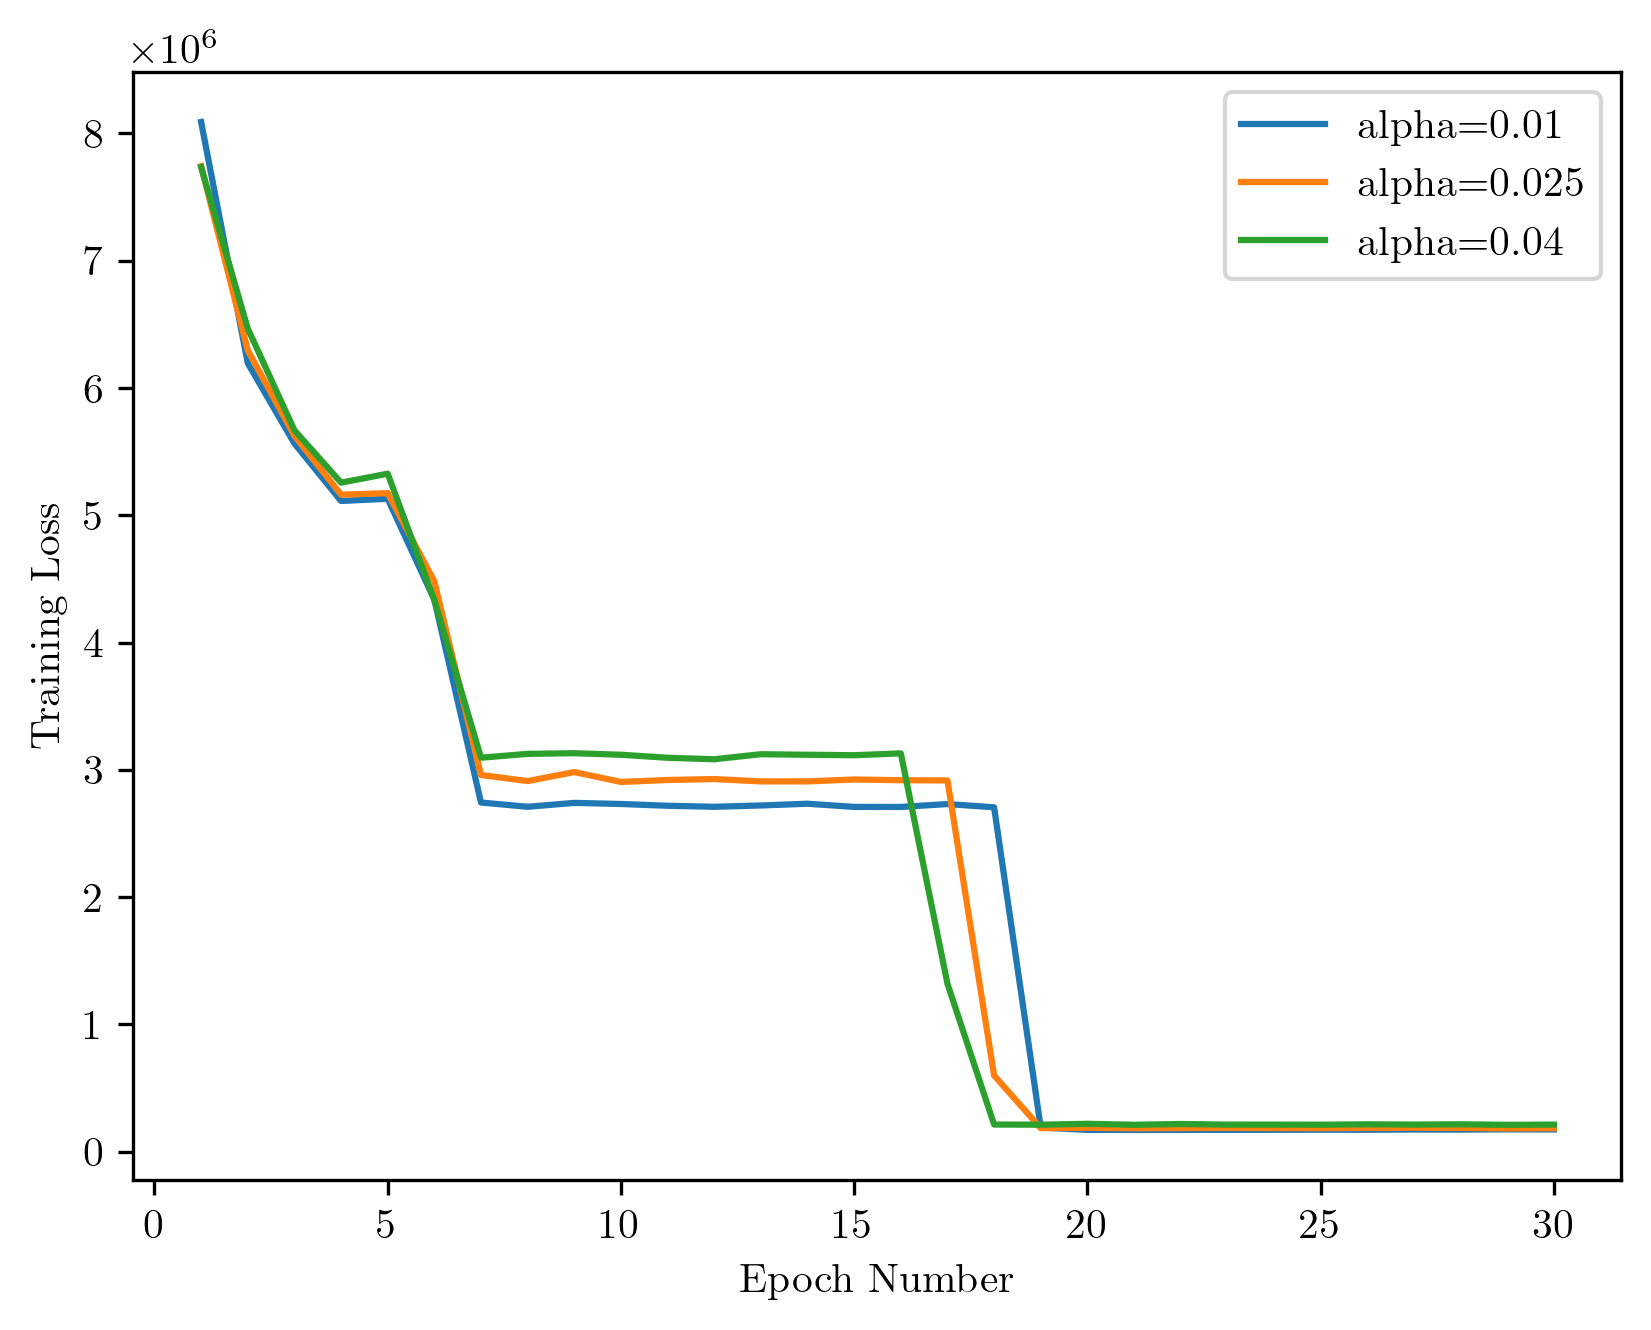

In [21]:
import re
from matplotlib.pyplot import Figure
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["figure.dpi"] = 300
matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["font.serif"] = ["Computer Modern"]

cols_ordered = [0.01, 0.025, 0.04]
# plt.figure(figsize=(25, 10))
for col in cols_ordered:

    data_col = f"{col}_true"
    ax = sns.lineplot(
        x=[i for i in range(1, 31)],
        y=[(loss) for loss in losses_df[data_col]][:30],
        label=f"alpha={col}",
    )

ax.set(xlabel="Epoch Number", ylabel="Training Loss")
plt.show()

# Number of Ingredients Per Recipe

In [10]:
from recipe_rec.data import load_dataset

load_dataset("./data/recipes.csv")

from recipe_rec.data import store

recipes = store["recipes"]

In [11]:
recipes["IngredientLen"] = recipes["RecipeIngredientParts"].str.len()

In [12]:
len(recipes[recipes["IngredientLen"] > 19])

4721

15:41:46 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:41:46 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:41:46 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:41:46 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:41:46 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:41:46 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:41:46 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:41:46 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:41:46 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:41:46 texmanager  No LaTeX-compatible font found for

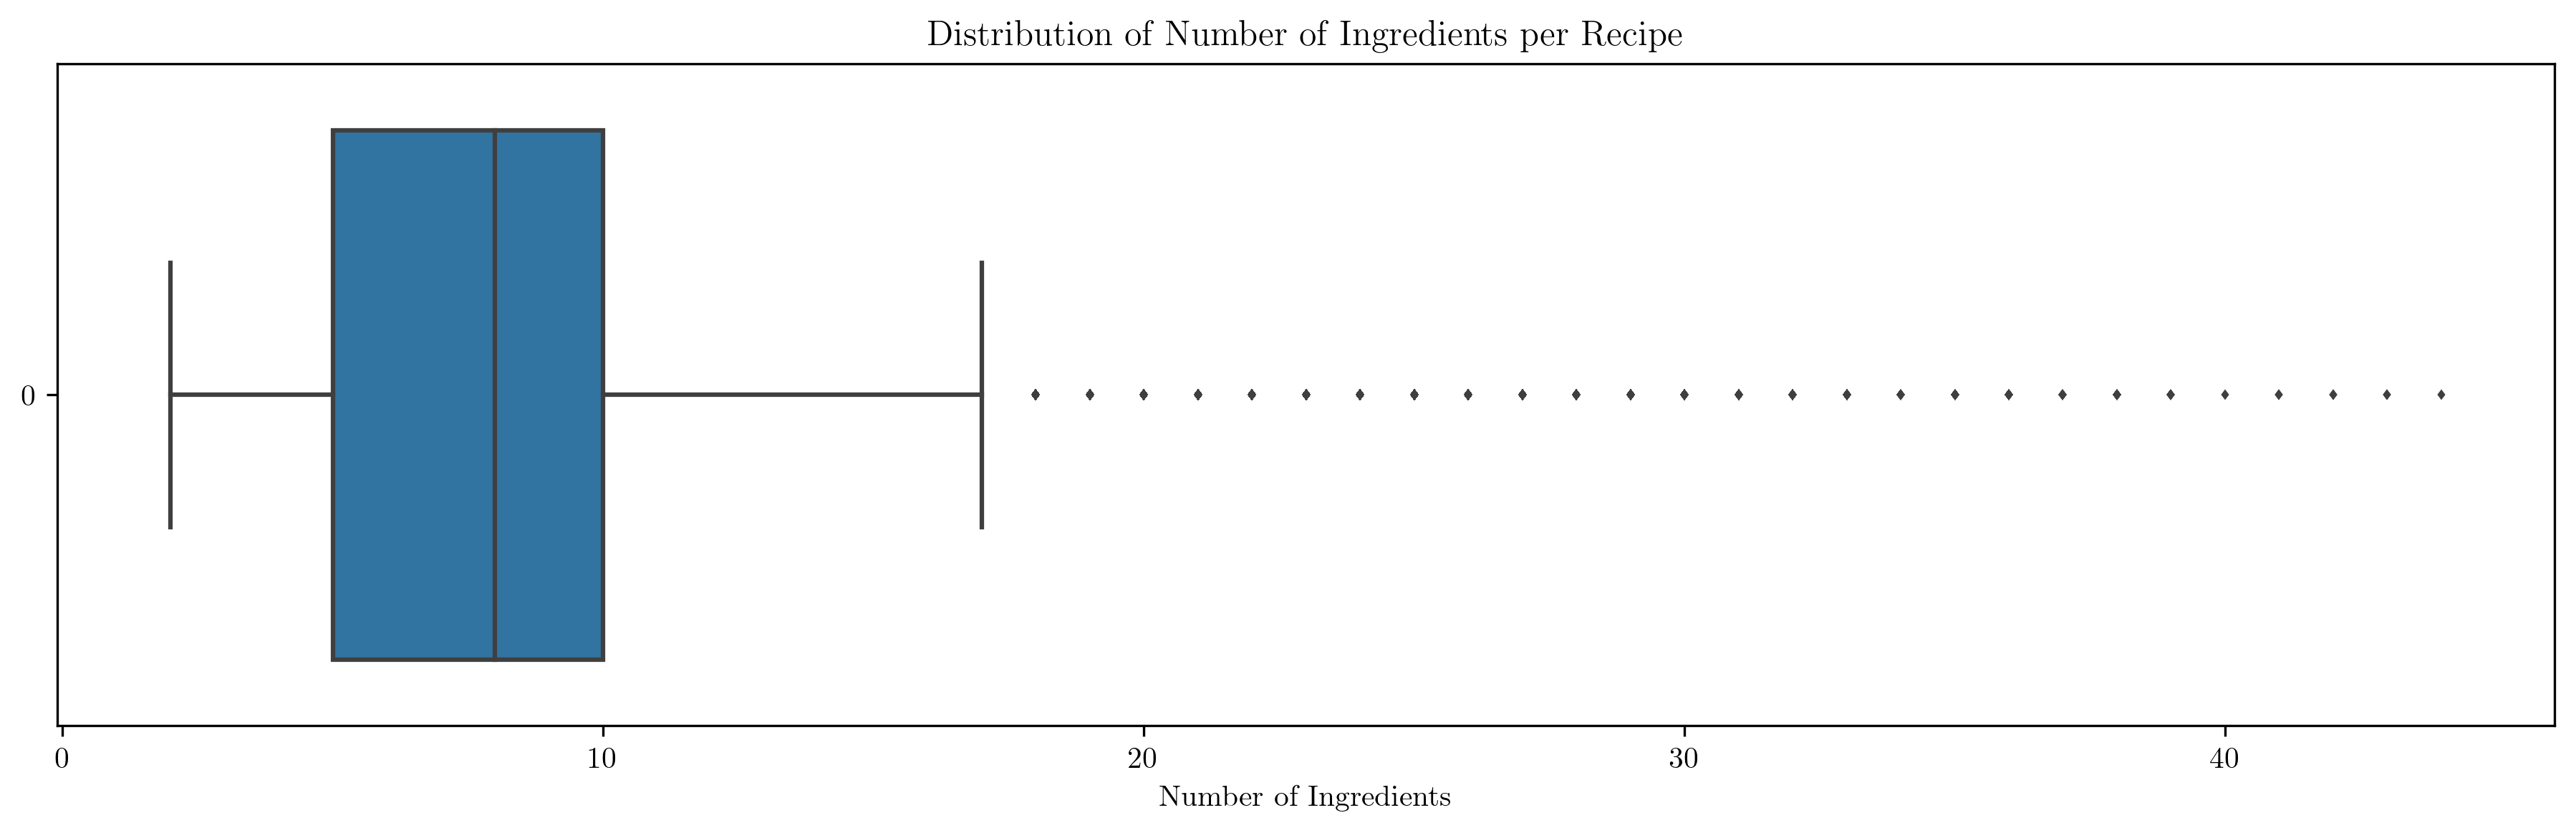

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 4))
ax = sns.boxplot(recipes["IngredientLen"], fliersize=1.5, orient="h")

ax.set(
    xlabel="Number of Ingredients",
    title="Distribution of Number of Ingredients per Recipe",
)

plt.show()

Statistics:

In [14]:
recipes["IngredientLen"].describe()

count    511626.000000
mean          8.054245
std           3.847504
min           2.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          44.000000
Name: IngredientLen, dtype: float64

In [15]:
recipes["IngredientLen"].median()

8.0

Number of training words:

In [16]:
recipes["IngredientLen"].sum()

4120761

# Ingredient Count Distribution

In [17]:
ingredient_counts = {}

for recipe in recipes["RecipeIngredientParts"]:

    for ingredient in recipe:

        if ingredient in ingredient_counts:

            ingredient_counts[ingredient] += 1

        else:

            ingredient_counts[ingredient] = 1

In [18]:
len(ingredient_counts)

7358

In [19]:
import numpy as np
import pandas as pd

15:42:00 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:00 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:00 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:00 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:00 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:00 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:00 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:00 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:01 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:01 texmanager  No LaTeX-compatible font found for

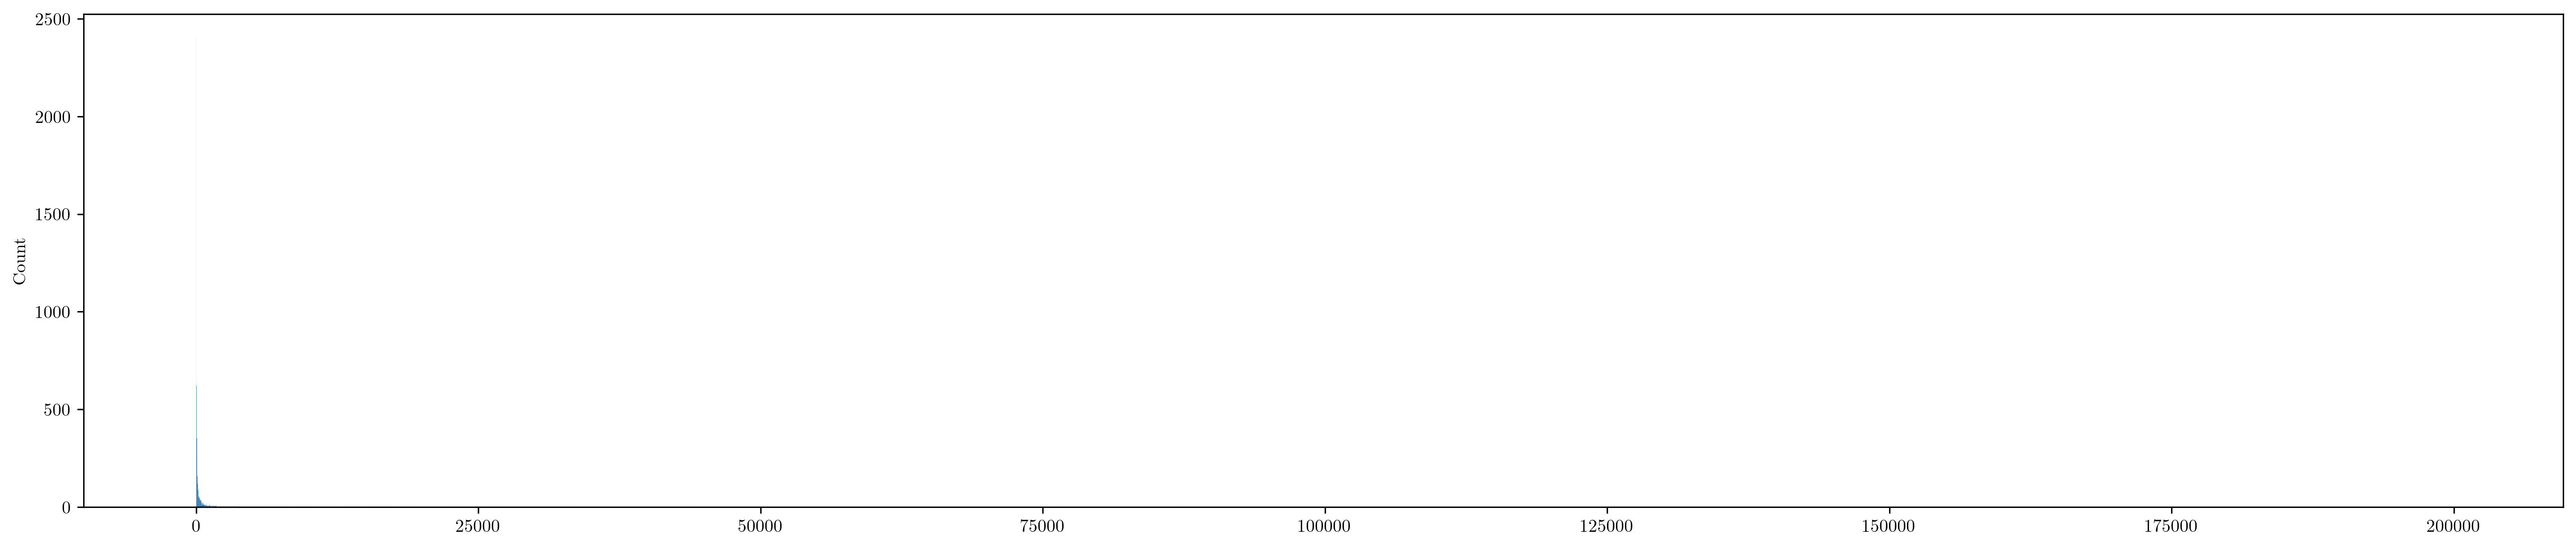

15:42:06 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:06 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:06 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:06 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:06 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:06 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:06 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:06 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:06 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:42:06 texmanager  No LaTeX-compatible font found for

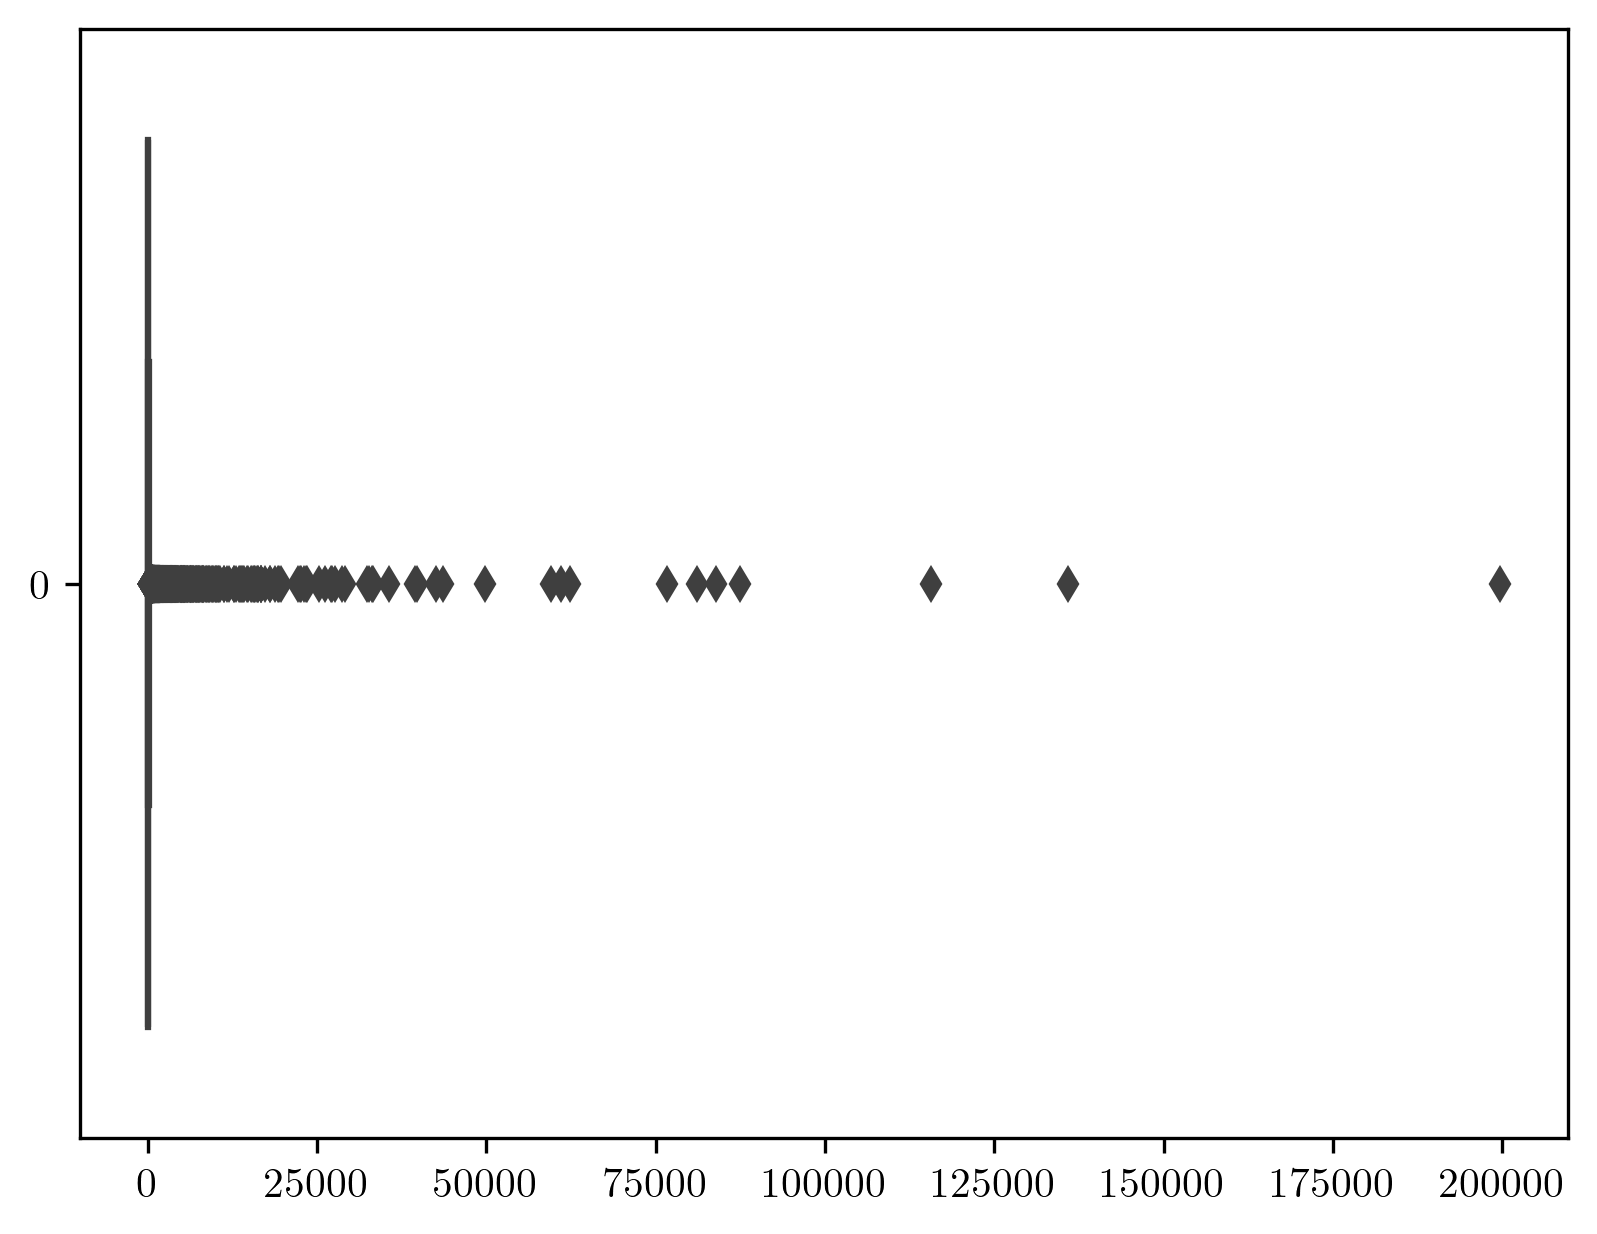

count      7358.000000
mean        560.038190
std        4452.103373
min           1.000000
25%           2.000000
50%          15.000000
75%         112.000000
max      199717.000000
dtype: float64

In [20]:
ingredient_labels = ingredient_counts.keys()
ingredient_counts_y = np.array(list(ingredient_counts.values()))

# ingredient_counts_y = ingredient_counts_y[ingredient_counts_y < np.quantile(ingredient_counts_y, 1.0)]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 5))

sns.histplot(
    ingredient_counts_y[ingredient_counts_y > np.quantile(ingredient_counts_y, 0.2)],
    thresh=5,
)
plt.show()
sns.boxplot(ingredient_counts_y, orient="h")
plt.show()

display(pd.Series(ingredient_counts_y).describe())